# Diamond Price Predition Analysis
## Importing dataset, Dividing into test train, Label encoding the features

In [0]:
#LabelEncoder
from sklearn import preprocessing as PP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('diamonds.csv', usecols= range(1,11))
print(dataset.info())
df=dataset.copy()
df['Cut']=PP.LabelEncoder().fit_transform(df['cut'])
df['Color']=PP.LabelEncoder().fit_transform(df['color'])
df['Clarity']=PP.LabelEncoder().fit_transform(df['clarity'])
df=df.drop(['cut'],axis=1)
df=df.drop(['color'],axis=1)
df=df.drop(['clarity'],axis=1)
x = df
y = df['price']
x=x.drop('price',axis=1)
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


,carat,depth,table,x,y,z,Cut,Color,Clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3


## Dividing into train and test and checking Accuracy:
## Models used: Linear Regression and RandomForest Regression

In [0]:

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression(0)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model LinearRegression:')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

clf_lr = RandomForestRegressor(n_estimators=10)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model RandomForestRegressor: ')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



Model LinearRegression:
Score : 0.8802
[0.88141888 0.86405203 0.87687436 0.88592531 0.88403035]

MSE    : 1887826.07 
MAE    : 889.47 
RMSE   : 1373.98 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Model RandomForestRegressor: 
Score : 0.9790
[0.97738294 0.97593976 0.97743792 0.98044888 0.97893815]

MSE    : 330833.95 
MAE    : 286.85 
RMSE   : 575.18 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished


## Feature Importance

In [0]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(train_x, train_y)
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
carat,0.623
y,0.267
Clarity,0.064
Color,0.029
z,0.006
x,0.004
depth,0.003
table,0.002
Cut,0.001


## Heat Map

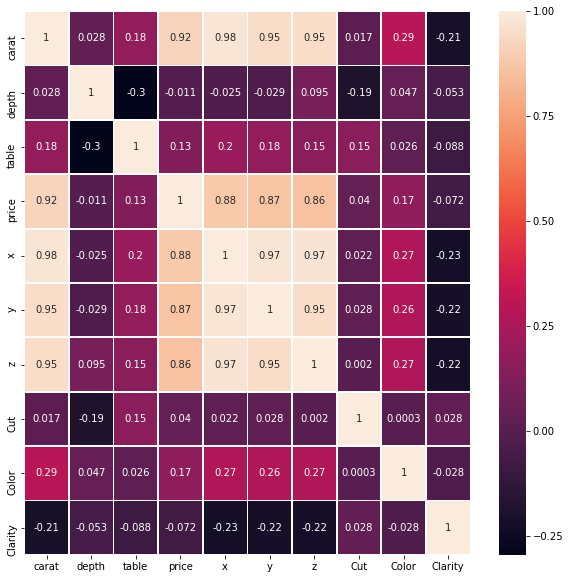

In [0]:
f ,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.75)

## Pairplot

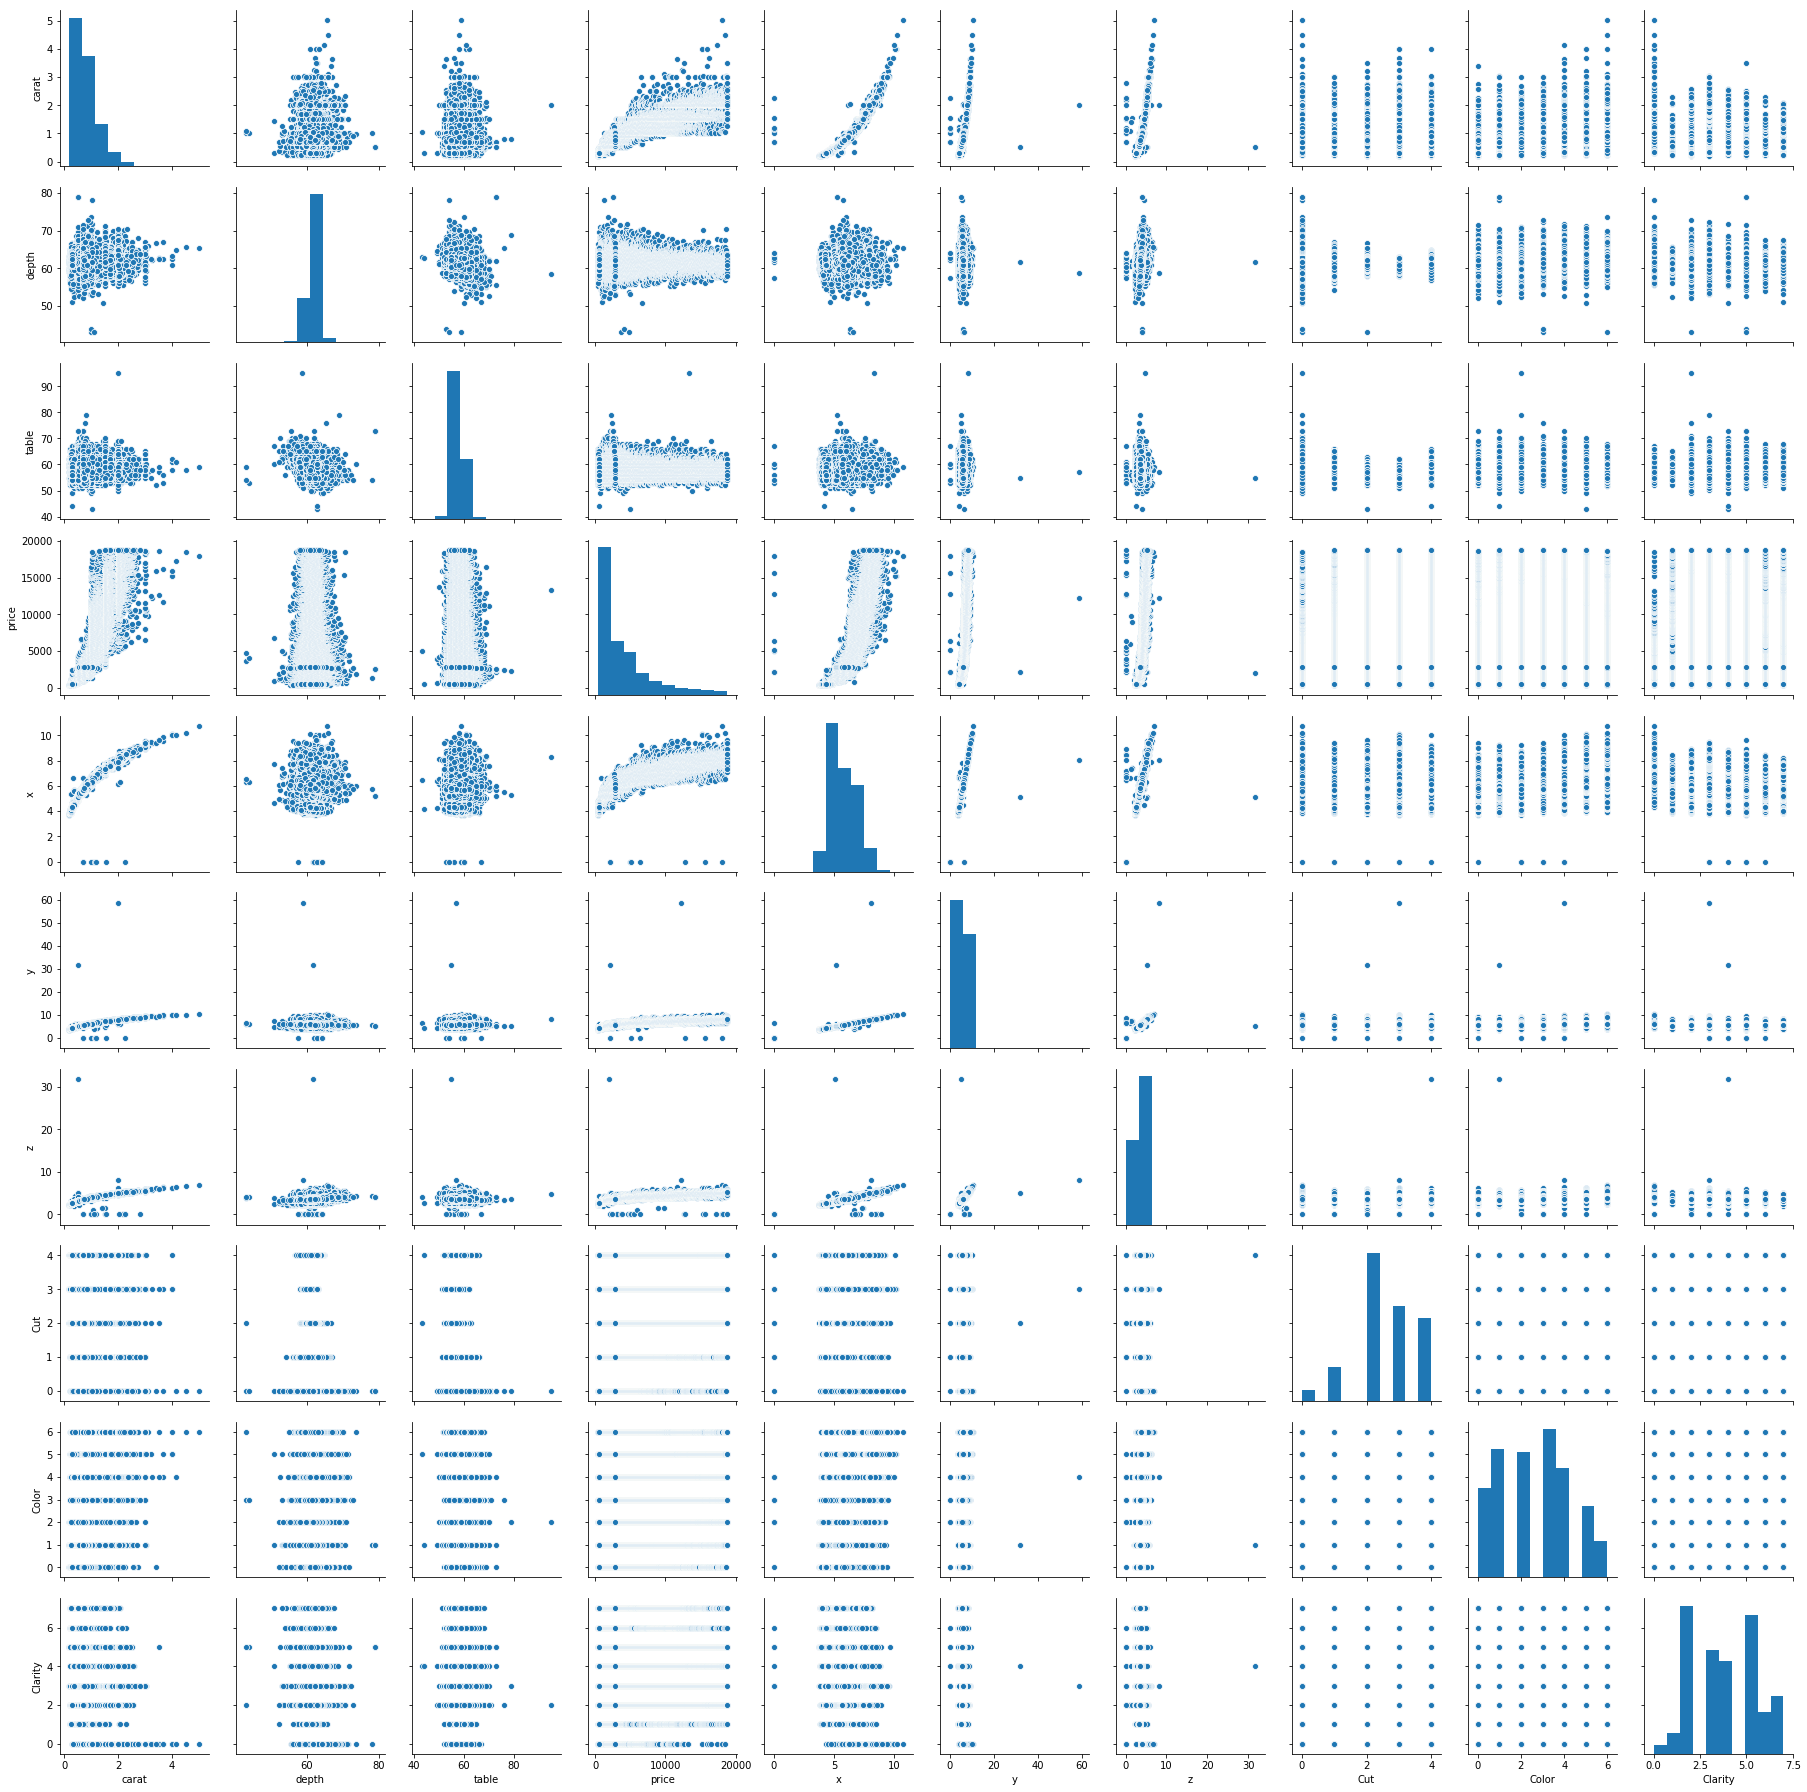

In [0]:
sns.pairplot(df)

## Creating new feature vol=x*y*z

In [0]:
df['vol']=df['x']*df['y']*df['z']

In [0]:
x = df
y = df['price']
x=x.drop('price',axis=1)
x.head()

,carat,depth,table,x,y,z,Cut,Color,Clarity,vol
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3,38.202030
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2,34.505856
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4,38.076885
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5,46.724580
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3,51.917250


## Dividing into train and test and checking Accuracy:
## Models used: Linear Regression and RandomForest Regression

In [0]:

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression(0)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model LinearRegression:')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

clf_lr = RandomForestRegressor(n_estimators=10)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model RandomForestRegressor: ')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



Model LinearRegression:
Score : 0.8818
[0.88250168 0.86551118 0.87791005 0.79110007 0.88500093]

MSE    : 1863231.80 
MAE    : 877.67 
RMSE   : 1365.00 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Model RandomForestRegressor: 
Score : 0.9785
[0.97848435 0.97437212 0.97781662 0.98103134 0.97924755]

MSE    : 338423.39 
MAE    : 287.81 
RMSE   : 581.74 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s finished


## Dropping features already used in new column

In [0]:
df=df.drop(['x'],axis=1)
df=df.drop(['y'],axis=1)
df=df.drop(['z'],axis=1)

## Dividing into train and test and checking Accuracy:
## Models used: Linear Regression and RandomForest Regression

In [0]:

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression(0)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model LinearRegression:')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

clf_lr = RandomForestRegressor(n_estimators=10)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model RandomForestRegressor: ')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



Model LinearRegression:
Score : 0.8818
[0.88250168 0.86551118 0.87791005 0.79110007 0.88500093]

MSE    : 1863231.80 
MAE    : 877.67 
RMSE   : 1365.00 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Model RandomForestRegressor: 
Score : 0.9785
[0.97810301 0.97362194 0.97802678 0.9802408  0.97853898]

MSE    : 339476.56 
MAE    : 288.18 
RMSE   : 582.65 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s finished


## Creating new feature CarVol=carat+vol

In [0]:
df['carvol']=df['carat']+df['vol']
df=df.drop(['carat'],axis=1)

In [0]:
x = df
y = df['price']
x=x.drop('price',axis=1)
x.head()

,depth,table,Cut,Color,Clarity,vol,carvol
0,61.5,55.0,2,1,3,38.202030,38.432030
1,59.8,61.0,3,1,2,34.505856,34.715856
2,56.9,65.0,1,1,4,38.076885,38.306885
3,62.4,58.0,3,5,5,46.724580,47.014580
4,63.3,58.0,1,6,3,51.917250,52.227250


## Dividing into train and test and checking Accuracy:
## Models used: Linear Regression and RandomForest Regression

In [0]:

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression(0)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model LinearRegression:')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

clf_lr = RandomForestRegressor(n_estimators=10)
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('Model RandomForestRegressor: ')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



Model LinearRegression:
Score : 0.8778
[0.87830916 0.8779774  0.87465545 0.87951015 0.88157605]

MSE    : 1925837.80 
MAE    : 937.84 
RMSE   : 1387.75 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Model RandomForestRegressor: 
Score : 0.9778
[0.97769838 0.97273299 0.97588153 0.98036757 0.97789053]

MSE    : 349375.87 
MAE    : 303.36 
RMSE   : 591.08 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished


**Comparing Accuracies through various ways, it seems the dataset is really good as the accuracy doesn't show much deflection**